# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [5]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (34/34), 7.18 MiB | 21.62 MiB/s, done.
Resolving deltas: 100% (7/7), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

QUESTION 1 RESPONSE

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data1 = pd.read_csv('https://raw.githubusercontent.com/vrhughes/visualization/main/assignment/data/college_completion.csv', low_memory = False)

print(data1.shape, '\n')
  # there are 3798 observations and 63 columns in our csv
print(data1.head(), '\n')

(3798, 63) 

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ..

In [29]:
print(pd.crosstab(data1['control'], data1['level']), '\n')
print(pd.crosstab(data1['control'], data1['level'], normalize = 'all'), '\n')

# The 4 year is much more likely to be private not for profit
# Both the 2 and 4 year have relatively the same likelihood of being private for profit
# The 2 year is 8% higher when it comes to being public

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



In [ ]:
sns.histplot(data1['grad_100_value'])
plt.show()

sns.kdeplot(data1['grad_100_value'])
plt.show()

sns.boxplot(data = data1, x = 'grad_100_value')
plt.show()

print(data1['grad_100_value'].describe())

In [ ]:
sns.kdeplot(data = data1, x = 'grad_100_value', hue = 'control')
plt.show()
sns.kdeplot(data = data1, x = 'grad_100_value', hue = 'level')
plt.show()
# both look like flattened bell curves, some (control private for profit and level 4 year) have higher densities on one end of the platuae.

data1.loc[:, ['control', 'grad_100_value']].groupby('control').describe()


In [ ]:
data1.loc[:, ['level', 'grad_100_value']].groupby('level').describe()

In [ ]:
data1['levelXcontrol'] = data1['level'] + ', ' + data1['control']

sns.kdeplot(data = data1, x = 'grad_100_value', hue = 'levelXcontrol')
plt.xlim(-20, 100)
plt.show()

data1.loc[:, ['level', 'control', 'grad_100_value']].groupby(['level', 'control']).describe()

# from the group kde plot and table it seems like 2 and 4 year private not for profit schools have the best graduation rates,
# while 2 year public has by far the worst graduation rate. 2 year private for profit is an easy third place for graduation rates,
# and it is about 2 times that of its counterpart 4 year private for profit.

In [ ]:
sns.kdeplot(data = data1, x = 'aid_value')
plt.show()

data1['aid_value_arcsinh'] = np.arcsinh(data1['aid_value'])
sns.kdeplot(data = data1, x = 'aid_value_arcsinh')
plt.show()

sns.kdeplot(data = data1, x = 'aid_value', hue = 'control')
plt.show()
sns.kdeplot(data = data1, x = 'aid_value_arcsinh', hue = 'control')
plt.show()

sns.kdeplot(data = data1, x = 'aid_value', hue = 'level')
plt.show()
sns.kdeplot(data = data1, x = 'aid_value_arcsinh', hue = 'level')
plt.show()

# graphs are pretty pointy (lessens when we use the arcsinh aid_value), there are a few noticable smaller humps
# but those are much easier to see when we use the arcsinh aid_value. Density for normal aid_value is very low


data1.loc[:, ['level', 'aid_value']].groupby('level').describe()


In [ ]:
data1.loc[:, ['control', 'aid_value']].groupby('control').describe()

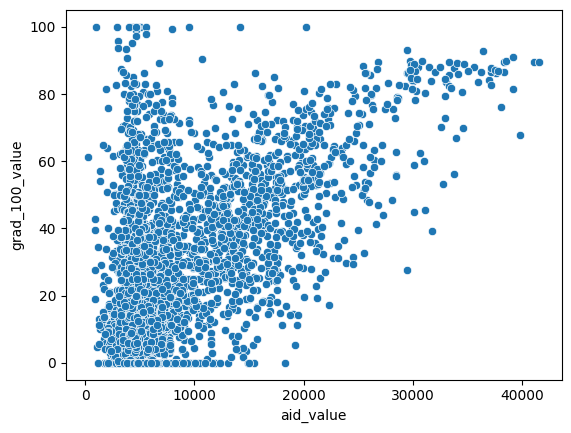

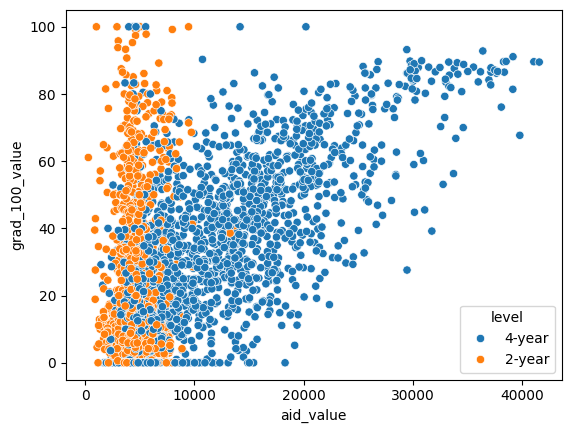

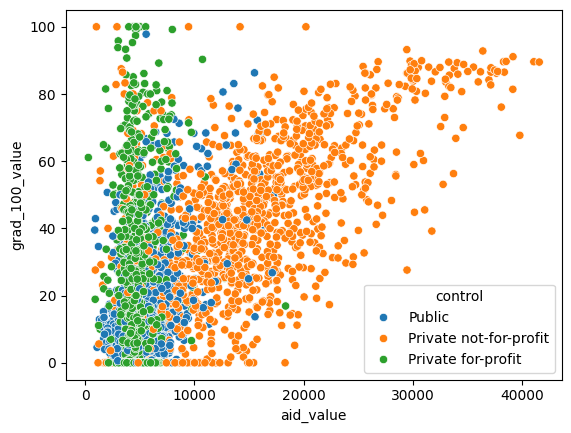

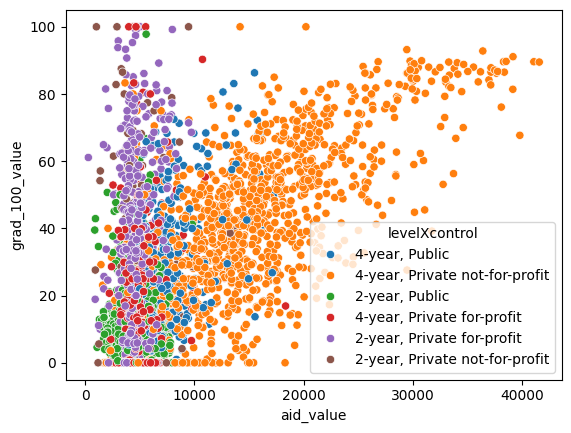

In [ ]:
sns.scatterplot(data = data1, x = 'aid_value', y = 'grad_100_value')
plt.show()

# looks like the top of the letter k, seems to be a somewhat linear relationship as well as a very large spike
# at around 5000 aid_value

sns.scatterplot(data = data1, x = 'aid_value', y = 'grad_100_value', hue = 'level')
plt.show()
# this hue gives lots of clarity on the graph, as I assumed earlier there are two main relationships: linear for 4 year
# and a spike for 2 year

sns.scatterplot(data = data1, x = 'aid_value', y = 'grad_100_value', hue = 'control')
plt.show()
# this hue also gives clarity, again there is a more linear looking relation for private not for profit, and the spike is private for profit.
# additionally, there is the public variable which seems to be somewhat blob like. given how densely packed that lower left corner
# of the graph is I can see how there would be a third relationship kind of blending into the middle of the other two.

sns.scatterplot(data = data1, x = 'aid_value', y = 'grad_100_value', hue = 'levelXcontrol')
plt.show()

# It seems that increased aid for 4 year school, especially private not for profit,  increases graduation rate.


**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [ ]:
data2 = pd.read_csv('https://raw.githubusercontent.com/vrhughes/visualization/main/assignment/data/airbnb_hw.csv', low_memory = False)

# cleaning from wrangling assignment, Q2
# assign variable name and look for unique values to see problems easier
price = data2['Price']
print(price.unique(), '\n')

# reassign getting rid of commas
price = price.str.replace(',', '')
print(price.unique(), '\n')

# find out type of price, if it is not price then will need to coerce
print('Before coercion: \n', price.describe(), '\n')

# coerce price to numeric from object type
price = pd.to_numeric(price, errors = 'coerce')

# see after coercion and check again for unique values
print('After coercion: \n', price.describe(), '\n', price.unique(), '\n')

# missing dummy to see if any values are missing
data2['price_missing'] = price.isnull()
print('Missing: \n', sum(data2['price_missing']), '\n')

del price9

In [ ]:
# part 2
print(data2.shape, '\n') # dimensions
print(data2.dtypes, '\n') # variable/column types
print(data2.columns, '\n') # col names
data2.head()

# the data has 30478 observations and 14 variables/columns
# the variables are host id, host since, name, neighbourhood, property type, review scores rating (bin), room type, zip, beds, number of records,
# number of reviews, price, reveiw scores rating, and price_missing

In [ ]:
# part 3
print(pd.crosstab(data2['Room Type'], data2['Property Type']), '\n')
# apartments are by far the most common property type, houses are second. Private rooms are more common than renting the entire property for
# bed and breakfasts, houses, dorms, castles, chalets, huts, tents, treehouses and the other category.

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

In [ ]:
# part 4


**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [12]:
# 1. I downloaded the suggested data
# 2. The data dictionary on occasion will have a certain number to indicate if the response was unknown. Some variables do noth have this option though.
  # in the notes section of the dictionary it will also say if all respondents answers were included, which can five us insight if not all answers
  # are included.

# 3. The two interesting variables I want to study are race/ethnicity age group (DEM_RE_AGE) and total office visits in current year (ADM_H_PHYEVT).
  # I think the total office visits gives a good base for lots of trends, and I think the race/ethinicity age group really helps to break the data
  # into specific categories that will (hopefully) result in clear patterns. I pulled all of this from the fall file.

data4 = pd.read_csv('https://raw.githubusercontent.com/vrhughes/visualization/main/fall2021.csv', low_memory = False)

race = data4['DEM_RE_AGE']
visits = data4['ADM_H_PHYEVT']
# Analyzing cleanliness of data
print(race.value_counts(), '\n')
print(visits.value_counts(), '\n')
# There are no null values in the data and they are already numbers so I consider
# this clean, also all values correspond to the dicitonary.

DEM_RE_AGE
2     3351
3     3338
4     1455
1     1323
11     619
10     507
5      409
6      395
14     300
7      276
9      270
13     255
12     154
8      131
Name: count, dtype: int64 

ADM_H_PHYEVT
0    7090
1    2286
2    1623
3     816
4     485
5     483
Name: count, dtype: int64 

0 



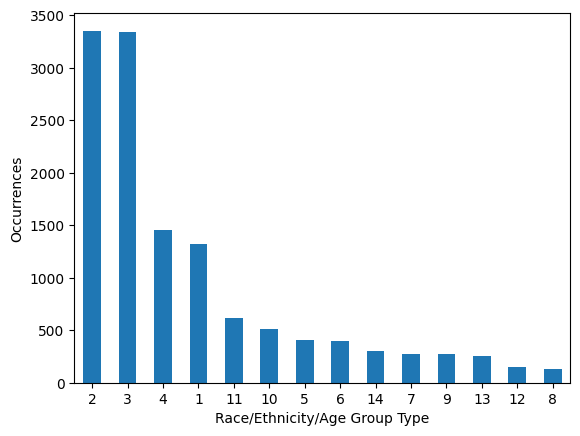

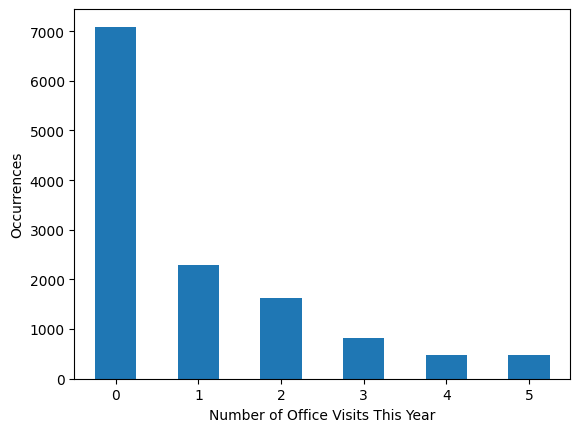

In [26]:
# Making a bar plot for each variable
race.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Race/Ethnicity/Age Group Type')
plt.ylabel('Occurrences')
plt.show()
# types 2 and 3 make up the largest portion of the data and correlate to Non-Hispanic white, 65-74 years
    # and Non-Hispanic white, 75-84 years.

visits.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Number of Office Visits This Year')
plt.ylabel('Occurrences')
plt.show()
